## Questions
* Seasonality in satellited derived sea ice extent over the Greenland sea for the past 20 years
* Seasonality in surface ocean nitrate concentration over the Greenland sea for the past 20 years
* Is there a link and what is the relationship?

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import datetime
import pyproj
import cartopy
import numpy as np

In [28]:
ds = xr.open_mfdataset("AMSR2_ASI_sea_ice_concentration*.nc", combine='by_coords')

## Convert co-ordinates from x,y to lat long

In [30]:
# Output coordinates are in WGS 84 longitude and latitude
projOut = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file

projIn = pyproj.Proj(init='epsg:3411',
    preserve_units=True)
#+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs
#+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +a=6378273 +b=6356889.449 +units=m +no_defs 
# here is a coordinate pair near the middle of your data set
#x, y = 0.0, -2000000
#x, y = 443962.4864344142,-310865.8796837029
#'+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
# transform x,y to lon/lat

# lon = np.zeros((ds.x.size,ds.y.size))
# lat = np.zeros((ds.x.size,ds.y.size))
xx, yy = np.meshgrid( ds.x.values, ds.y.values)
lon,lat= pyproj.transform(projIn, projOut, xx, yy )
ds['lon'] = (('y','x'),lon)
ds['lat'] = (('y','x'),lat)
ds

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_1946/3955515765.py:20: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon,lat= pyproj.t

<xarray.Dataset>
Dimensions:              (time: 2580, x: 1216, y: 1792)
Coordinates:
  * x                    (x) float64 -3.847e+06 -3.841e+06 ... 3.747e+06
  * y                    (y) float64 -5.347e+06 -5.341e+06 ... 5.847e+06
  * time                 (time) datetime64[ns] 2012-09-01 ... 2019-12-31
Data variables:
    polar_stereographic  (time) |S1 dask.array<chunksize=(30,), meta=np.ndarray>
    z                    (time, y, x) float32 dask.array<chunksize=(30, 1792, 1216), meta=np.ndarray>
    lon                  (y, x) float64 -80.73 -80.69 -80.65 ... 102.4 102.3
    lat                  (y, x) float64 33.96 33.98 34.01 ... 31.44 31.42 31.4
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:52:12 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

In [61]:
projIn = pyproj.Proj(init='epsg:4326')

# Input coordinates are in meters on the Polar Stereographic 
# projection given in the netCDF file

projOut = pyproj.Proj(init = 'epsg:3411',
    preserve_units=True)
# here is a coordinate pair near the middle of your data set
lon, lat = -35, 60
#'+proj=stere +lat_0=90 +lat_ts=70 +lon_0=-45 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
# transform x,y to lon/lat
x, y = pyproj.transform(projIn, projOut, lon, lat)
#answer1: x = 577072.9236190787; y = -3272743.18031452
#amswer2: x = 443962.4864344142; y = -310865.8796837029

/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/srv/conda/envs/notebook/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_504/840015512.py:12: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = pyproj.trans

## Select only the Greenland Sea
* extent = [-30, 10, 85, 60]
* Min Lat = 60 / -3272743.18031452
* Min Long = -30 / 577072.9236190787
* Max Lat = 85 / -310865.8796837029
* Max Long = 10 / 443962.4864344142

In [31]:
#GLarea = ds.where((ds.x>=443962.4864344142) & (ds.x<=577072.9236190787) & (ds.y <=-310865.8796837029 )  & (ds.y >= -3272743.18031452),drop = True)
GLarea = ds.where((ds.lon>=-10) & (ds.lon<=10) & (ds.lat <=85 )  & (ds.lat >= 70),drop = True)
GLarea

<xarray.Dataset>
Dimensions:              (time: 2580, y: 236, x: 236)
Coordinates:
  * x                    (x) float64 3.156e+05 3.219e+05 ... 1.778e+06 1.784e+06
  * y                    (y) float64 -1.784e+06 -1.778e+06 ... -3.156e+05
  * time                 (time) datetime64[ns] 2012-09-01 ... 2019-12-31
Data variables:
    polar_stereographic  (time, y, x) object dask.array<chunksize=(30, 236, 236), meta=np.ndarray>
    z                    (time, y, x) float32 dask.array<chunksize=(30, 236, 236), meta=np.ndarray>
    lon                  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    lat                  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    author:       University of Bremen, Gunnar Spreen [gunnar.spreen@uni-brem...
    Conventions:  CF-1.5
    GMT_version:  5.2.1 (r15220) [64-bit] [MP]
    history:      Mon Jan 21 18:52:12 2019: GDAL CreateCopy( /ssmi/www/htdocs...
    info:         AMSR2 sea ice concentration based on the ASI algorithm (Spr...
    title:        Produced by grdmath
    GDAL:         GDAL 2.1.3, released 2017/20/01

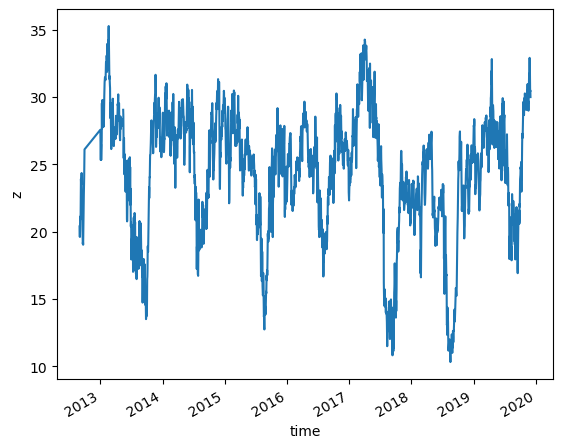

In [5]:
GLarea['z'].sel(time = slice('2003-01-01','2019-12-01')).mean(("x","y")).plot()

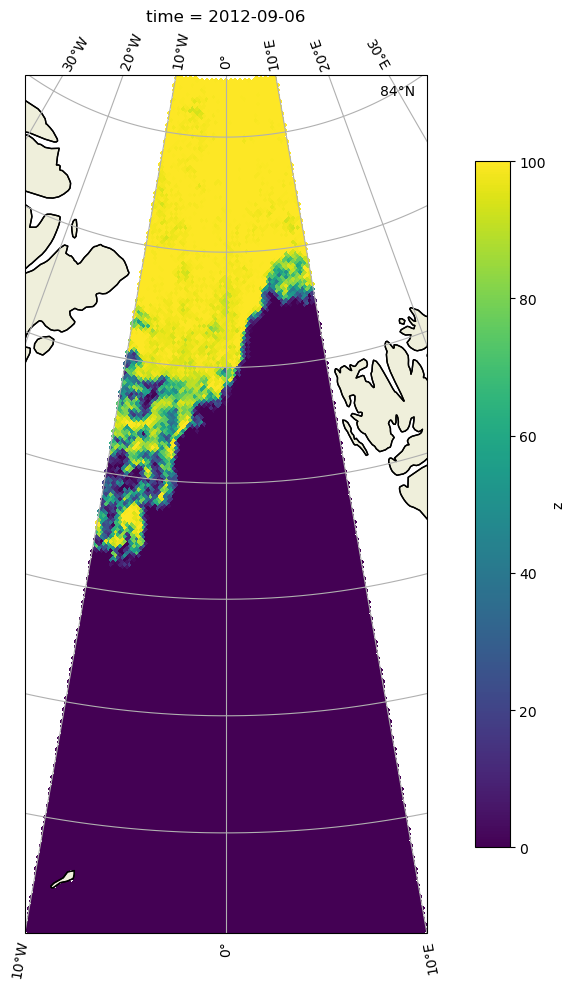

In [6]:
extent = [-10,10, 85, 70]
#extent = [-30, 10, 85, 60]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

GLarea.z.isel(time = 5).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    # levels=10,
        )
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

## Plot daily data for each year

In [67]:
GL_day = GLarea.z.groupby('time.dayofyear')
#GL_year.mean(("x","y")).plot()
#GLarea['z'].sel(time = slice('2003-01-01','2019-12-01')).mean(("x","y")).plot()
#GL_year(time = slice('2003','2019')).mean(("x","y")).plot()

In [80]:
GL_year = GLarea.z.groupby('time.year')

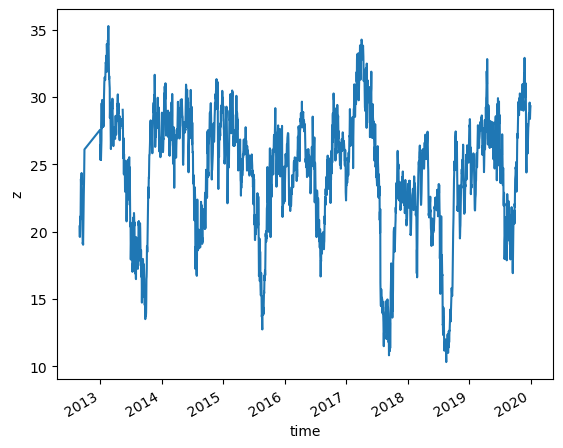

In [88]:
GL_day.mean(("x","y")).plot()



In [99]:
GL_year_mean = GL_year.mean(dim = ('x','y'))

In [103]:
test = GL_year_mean.groupby('time.year')

In [118]:
[test[2013].time.values[d] for d in range(360)]

[numpy.datetime64('2013-01-01T00:00:00.000000000'),
 numpy.datetime64('2013-01-02T00:00:00.000000000'),
 numpy.datetime64('2013-01-03T00:00:00.000000000'),
 numpy.datetime64('2013-01-04T00:00:00.000000000'),
 numpy.datetime64('2013-01-05T00:00:00.000000000'),
 numpy.datetime64('2013-01-06T00:00:00.000000000'),
 numpy.datetime64('2013-01-07T00:00:00.000000000'),
 numpy.datetime64('2013-01-08T00:00:00.000000000'),
 numpy.datetime64('2013-01-09T00:00:00.000000000'),
 numpy.datetime64('2013-01-10T00:00:00.000000000'),
 numpy.datetime64('2013-01-11T00:00:00.000000000'),
 numpy.datetime64('2013-01-12T00:00:00.000000000'),
 numpy.datetime64('2013-01-13T00:00:00.000000000'),
 numpy.datetime64('2013-01-14T00:00:00.000000000'),
 numpy.datetime64('2013-01-15T00:00:00.000000000'),
 numpy.datetime64('2013-01-16T00:00:00.000000000'),
 numpy.datetime64('2013-01-17T00:00:00.000000000'),
 numpy.datetime64('2013-01-18T00:00:00.000000000'),
 numpy.datetime64('2013-01-19T00:00:00.000000000'),
 numpy.datet

In [110]:
plt.plot(test[2013].time.dayofyear,test[2013])

AttributeError: 'DataArray' object has no attribute 'dayofyear'

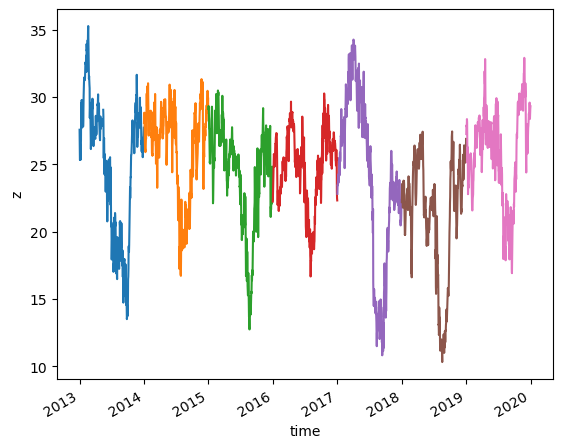

In [54]:
for y in range(2013,2020):
    GL_year[y].mean(("x","y"))


In [49]:
GL_year[y] for y in range(2013,2020)

GL_year[y].mean(("x","y")).plot()

SyntaxError: invalid syntax (1854368873.py, line 1)

In [55]:
GL_year[2013]

<xarray.DataArray 'z' (time: 362, y: 236, x: 236)>
dask.array<getitem, shape=(362, 236, 236), dtype=float32, chunksize=(31, 236, 236), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 3.156e+05 3.219e+05 3.281e+05 ... 1.778e+06 1.784e+06
  * y        (y) float64 -1.784e+06 -1.778e+06 ... -3.219e+05 -3.156e+05
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2013-12-31
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic

## Create monthly averages for all years

In [8]:
GL_month = GLarea.z.groupby('time.month').mean(dim = ["time"],keep_attrs=True)

In [9]:
area = 6.25**2
Totalarea = area*GLarea.y.size*GLarea.x.size
ice_m = GL_month.where(GL_month >= 15)
var = ice_m/ice_m

In [10]:
extent = ((area*var.sum(dim = ["y","x"]))/Totalarea).values
extent

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


array([0.11049268, 0.1162561 , 0.11367064, 0.11530451, 0.11340132,
       0.11636383, 0.10722493, 0.09027578, 0.09489012, 0.10704539,
       0.11255746, 0.10731471], dtype=float32)

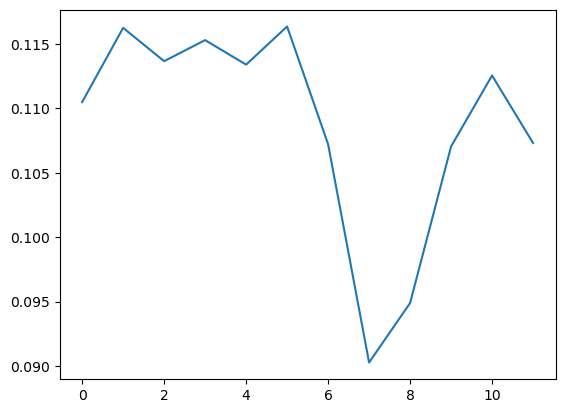

In [11]:
plt.plot(extent)

## Creat daily averages for all years

In [13]:
#ds_plt = ds.z.groupby('time.month').mean(dim = ["time","y","x"], keep_attrs=True)
GL_doy = GLarea.z.groupby('time.dayofyear').mean(dim = ["time","y","x"],keep_attrs=True)
GL_doy

<xarray.DataArray 'z' (dayofyear: 366)>
dask.array<getitem, shape=(366,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic

In [16]:
GL_doy.to_netcdf("Daily SIC ASMR2.nc")

In [17]:
daily = xr.open_dataset("Daily SIC ASMR2.nc")

In [18]:
daily

<xarray.Dataset>
Dimensions:    (dayofyear: 366)
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366
Data variables:
    z          (dayofyear) float32 ...

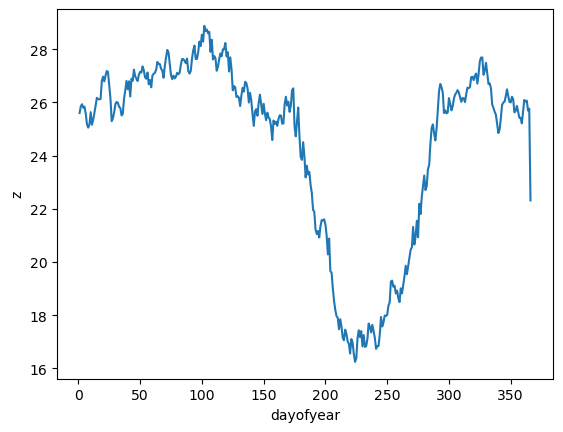

In [20]:
daily.z.plot(x='dayofyear')

## Plot maps of monthly averages for March and September 

In [49]:
GL_map = GLarea.z.groupby('time.month').mean(keep_attrs=True)
GL_map

<xarray.DataArray 'z' (month: 12, y: 236, x: 236)>
dask.array<transpose, shape=(12, 236, 236), dtype=float32, chunksize=(1, 236, 236), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 3.156e+05 3.219e+05 3.281e+05 ... 1.778e+06 1.784e+06
  * y        (y) float64 -1.784e+06 -1.778e+06 ... -3.219e+05 -3.156e+05
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     z
    actual_range:  [  0 100]
    grid_mapping:  polar_stereographic

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


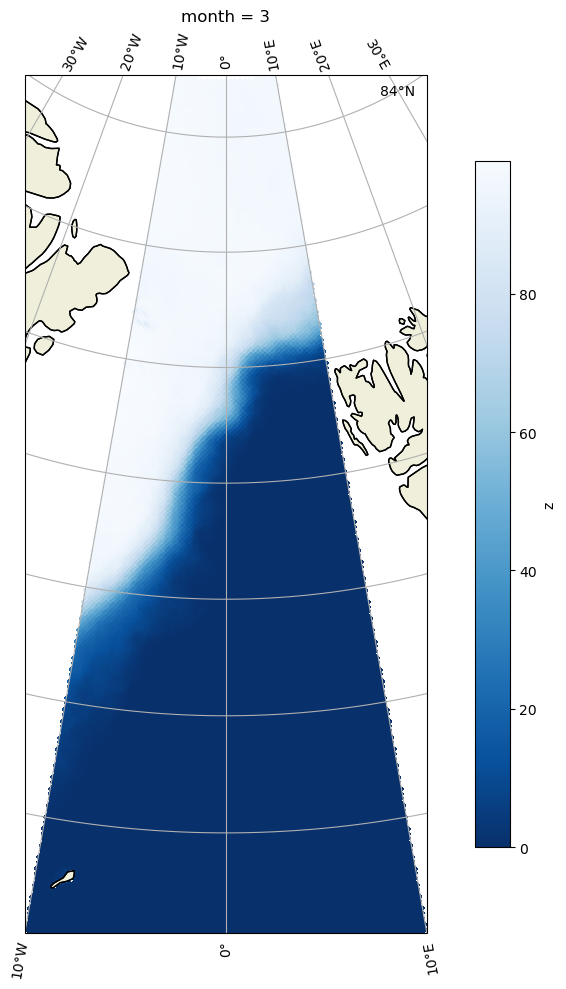

In [52]:
extent = [-10,10, 85, 70]
#extent = [-30, 10, 85, 60]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

GL_map.sel(month = 3).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    cmap=plt.colormaps['Blues_r']
    # levels=10,
        )
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregations.py:258: RuntimeWarning: invalid value encountered in divide
  finalize=lambda sum_, count: sum_ / count,


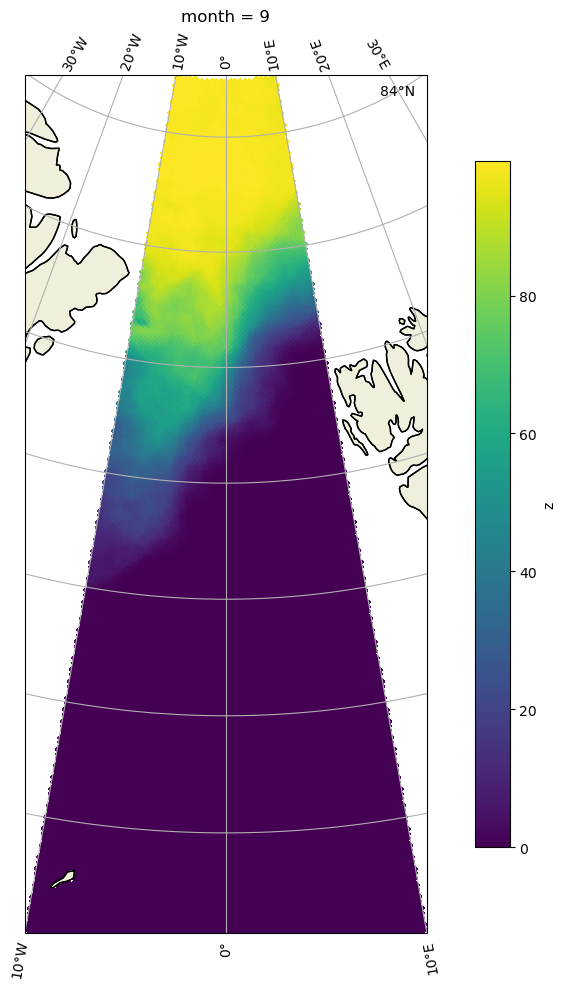

In [51]:
extent = [-10,10, 85, 70]
#extent = [-30, 10, 85, 60]
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.epsg(3411)})

GL_map3.sel(month = 9).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    # transform=ccrs.PlateCarree(),
    transform=ccrs.epsg(3411),
    # levels=10,
        )
ax.set_extent(extent, ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
fig.tight_layout()